                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                                 
                                            
                                            ЛАБОРАТОРНАЯ РАБОТА №6
                                     
                                               
                                                 Вариант 4
                                                                                                                                                                           
                                                                                  
                                                                          Выполнил: Пластовец Вадим (430гр)
                                          
                                                                         
                                                  2016 год

### Построение графика и линий уровня

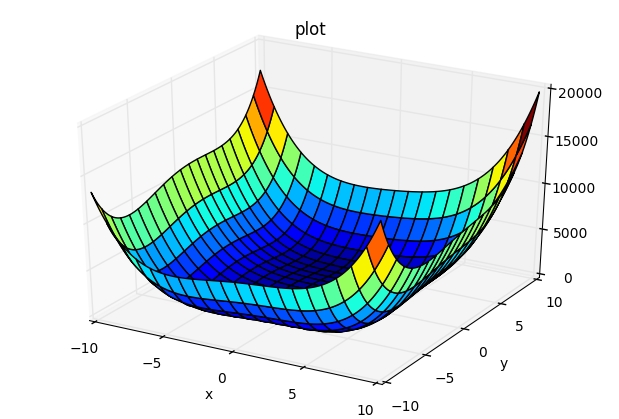

C:\Users\Вадим\Anaconda3\lib\site-packages\matplotlib\contour.py:465: RuntimeWarning: invalid value encountered in ceil
  I = [np.floor(I[0]), np.ceil(I[1])]


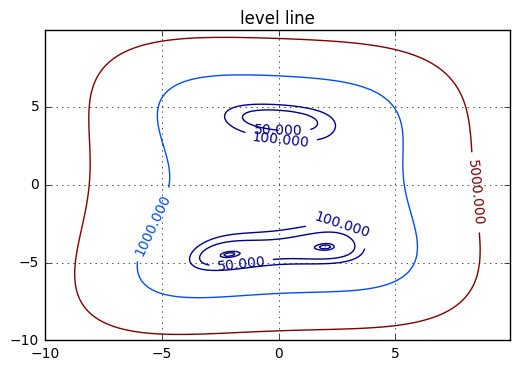

In [3]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def graf ():
    x = np.arange (-10, 10, 0.1)
    y = np.arange (-10, 10, 0.1)
    xgr, ygr = np.meshgrid(x, y)
    zgr = (xgr*xgr + ygr)**2 + (xgr + ygr*ygr - 18)**2 + 4
    return xgr, ygr, zgr

#график
x, y, z = graf()
fig = pylab.figure()
axes = Axes3D(fig)
#stride-число для сетки графика, сmap -"вид раскраски"
axes.plot_surface(x, y, z, rstride=10, cstride=10, cmap = cm.jet)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('plot')

pylab.show()

#линии уровня
x, y, z = graf ()
levels = [4.001, 5, 7, 50, 100, 1000, 5000]
cs = pylab.contour(x, y, z, levels)
pylab.title('level line')
pylab.clabel(cs)
plt.grid()
pylab.show()

### Поиск минимума методом сопряженных градиентов


Pointmax:  [ 2.01349258 -4.00698338]
f(max):  4.00704243695


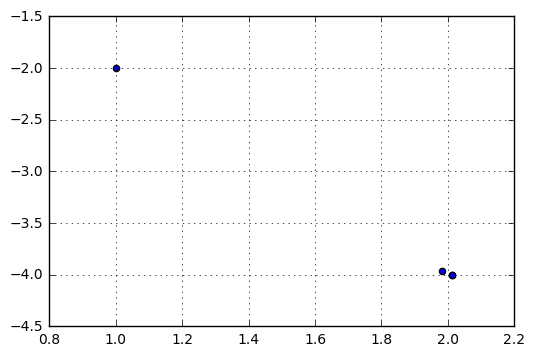

In [8]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.linalg as lin

#задание ф-ии
n=2
def func(X):
    return (X[0]*X[0] + X[1])**2 + (X[0] + X[1]*X[1] - 18)**2 + 4

#начальная точка
X0=[0,0]
X0[0]=1; X0[1]=-2

#точность
eps=0.001

#градиент
def Gr(func,X):
    G=np.zeros((n))
    for i in range (0,n):
        def pri(X):
            H=np.zeros((n))
            H[i]=eps
            P=(func(X+H)-func(X-H))/(2*eps)
            return P
        G[i]=pri(X)
    return G    

#поиск первого l, доставляющего минимум ф-ии, перебором
Al0=0 
for l in range (0,1000):
    l=l/100
    if func(X0+l*(-Gr(func,X0)))>func(X0+(l+1/100)*(-Gr(func,X0))):
        Al0=l+1/100     
R=np.zeros((n))
bet1=0
p0=-Gr(func,X0)
#получение 1 точки, чтобы потом искать b
X1=X0+Al0*(-Gr(func,X0))

spisX=[1]
spisY=[-2]
while lin.norm(X1-X0)/lin.norm(X1)>eps:
    f=0
    bet1=0
    R=Gr(func,X1)-Gr(func,X0)
    #поиск параметра b
    for u in range (0,n):
        bet1+=(Gr(func,X1)[u])*R[u]
    bet1=bet1/(lin.norm(Gr(func,X0)))**2
    p1=-Gr(func,X1)+p0*bet1
    #поиск всех дальнейших параметров l
    for l in range (0,1000):
        l=l/100
        if func(X1+l*p1)>func(X1+(l+1/100)*p1):
            f=l+1/100
    X0=X1     
    X1=X0+f*p1
    spisX.append(X1[0])
    spisY.append(X1[1])
    #print(X1)
    p0=p1

print ('Pointmax: ', X1)
print('f(max): ', func(X1))
plt.scatter(spisX, spisY)
plt.grid()
plt.show()